<a href="https://colab.research.google.com/github/carlaolivei/Analise-Modelagem-dados-COVID-19/blob/main/aprendizado_supervisiosado_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Importação das Bibliotecas</h1>

In [70]:
#Bibliotecas básicas
import pandas as pd
import numpy as np

#Bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pré-processamento e normalização
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

#Split de dados para treinamento e dados para teste
from sklearn.model_selection import train_test_split

#Algoritmos de Machine Learning para Aprendizado Supervisioando
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

#Métricas
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [22]:
pd.options.display.float_format = '{:.2f}'.format

<h1> Upload do Dataset</h1>

In [2]:
## https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu
## liberando o acesso ao drive
## use essa opção se utilizar o Google Drive, neste caso basta apenas colocar o arquivo em uma pasta do Drive e copiar o caminho
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#utilize esta opção se desejar fazer o upload do arquivo
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print("Upload concluído!")

Upload concluído!


<h1>Criação do Dataframe (df)</h1>

In [71]:
df = pd.read_csv('/content/gdrive/MyDrive/Inteligência Artificial/kaggle/My_datasets/Covid-19/df_covid19_countries.csv')
df.tail(1)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
234801,Zimbabwe,2023-01-04,259981.00,0.00,0.00,5637.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16320539.00,0.00,1.59,0.00


In [72]:
df.shape

(234802, 17)

In [25]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [73]:
df.shape

(234802, 17)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234802 entries, 0 to 234801
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 234802 non-null  object 
 1   date                     234802 non-null  object 
 2   total_cases              234802 non-null  float64
 3   new_cases                234802 non-null  float64
 4   new_cases_smoothed       234802 non-null  float64
 5   total_deaths             234802 non-null  float64
 6   new_deaths               234802 non-null  float64
 7   new_deaths_smoothed      234802 non-null  float64
 8   reproduction_rate        234802 non-null  float64
 9   total_vaccinations       234802 non-null  float64
 10  people_vaccinated        234802 non-null  float64
 11  people_fully_vaccinated  234802 non-null  float64
 12  total_boosters           234802 non-null  float64
 13  population               234802 non-null  float64
 14  vacc

In [75]:
df.isnull().sum()

location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
total_deaths               0
new_deaths                 0
new_deaths_smoothed        0
reproduction_rate          0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
vaccination_ratio          0
prevalence                 0
incidence                  0
dtype: int64

In [76]:
df['location'].unique().shape

(236,)

*  **Taxa de vacinação**: número total de pessoas que receberam pelo menos uma dose de vacina dividido pela População em risco (população brasileira. Esse tipo de dose foi escolhido devido ter uma correção maior com as novas mortes.

*   **Prevalência**: casos existentes da doença em um determinado momento dividido pela população em risco de ter a doença. Fórmula: Casos de COVID-19 ÷ População em risco * 100. Exemplo: 168.331 ÷ 210.000.000 * 100 = 0,08.

*   **Incidência**: novos casos da doença em uma população definida durante um período específico (um dia, por exemplo) dividido pela população em risco. Fórmula: Novos casos de COVID-19 em um dia ÷ População - Total de casos * 100. Exemplo: 5.632 ÷ 209.837.301 * 100 = 0,0026.

Fonte: https://www.scielo.br/j/jbpneu/a/yzdNrrMgb8xMwJ6sgQnrmWt/?format=pdf&lang=pt



In [77]:
df_corr1 = df[['total_cases','new_cases', 'new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed',
               'reproduction_rate','vaccination_ratio','prevalence','incidence']].corr()
df_corr1

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,vaccination_ratio,prevalence,incidence
total_cases,1.00,0.47,0.52,0.89,0.37,0.40,0.10,0.33,0.24,0.04
new_cases,0.47,1.00,0.92,0.42,0.55,0.52,0.11,0.22,0.11,0.15
new_cases_smoothed,0.52,0.92,1.00,0.46,0.56,0.58,0.11,0.23,0.13,0.12
total_deaths,0.89,0.42,0.46,1.00,0.47,0.50,0.12,0.28,0.12,0.01
new_deaths,0.37,0.55,0.56,0.47,1.00,0.94,0.10,0.07,0.01,0.02
new_deaths_smoothed,0.40,0.52,0.58,0.50,0.94,1.00,0.10,0.08,0.01,0.02
reproduction_rate,0.10,0.11,0.11,0.12,0.10,0.10,1.00,0.12,0.02,0.03
vaccination_ratio,0.33,0.22,0.23,0.28,0.07,0.08,0.12,1.00,0.34,0.10
prevalence,0.24,0.11,0.13,0.12,0.01,0.01,0.02,0.34,1.00,0.20
incidence,0.04,0.15,0.12,0.01,0.02,0.02,0.03,0.10,0.20,1.00


<h1> MODELAGEM PARA PREVISÃO DE NOVAS MORTES</h1>

<h1>Definição de função Regressão Linear (Linear Regression)</h1>

In [78]:
def regressao_linear_novas_mortes(nome_pais, df):
    """
    Chamada da função:
    ===> regressao_linear_novas_mortes("Brazil",df)
    """
    print('REGRESSÃO LINEAR NOVAS MORTES')
    print("-"*80)
    print(f"País: {nome_pais:}")
    # Store country data in a variable 
    df_pais = df[df.location == nome_pais]
    print(f"Quantidade de linhas: {df_pais.shape[0]}")
    
    # definição de x e y
    x = df_pais[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']]
    y = df_pais[['new_deaths']]
            
    # Divisão dos dados de treinamento e teste (split)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
    
    # Normalização dos dados - Standard Normalization(x)
    #std_x = RobustScaler()
    #std_x = Normalizer()
    #std_x = MinMaxScaler()
    std_x = StandardScaler()
    x_train = std_x.fit_transform(x_train)
    x_test = std_x.fit_transform(x_test)
    
    # Normalização dos dados - Standard Normalization(y)
    #std_y = RobustScaler()
    #std_y = Normalizer()
    #std_y = MinMaxScaler()
    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train)
    y_test = std_y.fit_transform(y_test)
    lr = linear_model.LinearRegression()
    
    # Treinando do modelo
    lr.fit (x_train, y_train)
    # Imprimindo os coeficientes
    print("-"*80)
    print("Coeficientes da Regressão Linear:\n")
    print (f'Coef (inclinação ou slop): {lr.coef_}')
    print (f'Intercept (interceptação): {lr.intercept_}')
       
    #Testando e avaliando o modelo
    predLR = lr.predict(x_test)
    print("-"*80)
    print("Métricas do Modelo:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predLR))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predLR))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
    print('R2:', metrics.r2_score(y_test, predLR))
    
    print("-"*80)
    #print("Dados de teste (reais) e dados previstos pelo modelo:\n")
    plt.figure()
    plt.plot(y_test, label='Dados Reais')
    plt.plot(predLR, label='Dados Previstos')
    plt.legend()
    plt.show()

<h1>Definição de função Regressão Polinomial (Polynomial Regression)</h1>

In [79]:
def regressao_polinomial_novas_mortes(nome_pais, df, degree=2):
    """
    Chamada da função:
    ===> regressao_polinomial_novas_mortes("Brazil",df, 2)
    """
    print('REGRESSÃO POLINOMIAL NOVAS MORTES')
    print("-"*80)
    print(f"País: {nome_pais:}")
    # Armazena o país na variável
    df_pais = df[df.location == nome_pais]
    print(f"Quantidade de linhas: {df_pais.shape[0]}")

    # Definição de x e y e divisão dos dados de treinamento e teste
    msk = np.random.rand(len(df_pais)) < .8
    train = df_pais[msk]
    test = df_pais[~msk]
    # Identificação das variáveis preditoras ou independentes (x) e rótulo ou variável dependente (y) dos dados de treinamento
    x_train = np.asanyarray(train[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']])
    y_train = np.asanyarray(train[['new_deaths']])
    # Identificação das variáveis preditoras ou independentes (x) e rótulo ou variável dependente (y) dos dados de treinamento
    x_test = np.asanyarray(train[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']])
    y_test = np.asanyarray(train[['new_deaths']])
    
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(x_train)
    
    # Treinando do modelo
    pr = linear_model.LinearRegression()
    y_train_ = pr.fit(train_x_poly, y_train)
    
    # Imprimindo o Intercept    
    print ('Intercept (interceptação): ',pr.intercept_[0])
       
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(x_test)
    predPR = pr.predict(test_x_poly)
    
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    print("-"*80)
    print("Métricas do Modelo:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predPR))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predPR))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predPR)))
    print('R2:', metrics.r2_score(y_test, predPR))

    print("-"*80)
    #print("Dados de teste (reais) e dados previstos pelo modelo:\n")
    plt.figure()
    plt.plot(y_test, label='Dados Reais')
    plt.plot(predPR, label='Dados Previstos')
    plt.legend()
    plt.show()

<h1>Definição de função Árvore de Decisão com Regressão (Decision Tree Regression)</h1>

In [80]:
def arvore_decisao_regressao_novas_mortes(nome_pais, df):
    """
    Chamada da função:
    ===> arvore_decisao_regressao_novas_mortes("Brazil",df)
    """
    print('ÁRVORE DE DECISÃO COM REGRESSÃO NOVAS MORTES')
    print("-"*80)
    print(f"País: {nome_pais:}")
    # Armazena o país na variável
    df_pais = df[df.location == nome_pais]
    print(f"Quantidade de linhas: {df_pais.shape[0]}")

    # definição de x e y
    x = df_pais[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']]
    y = df_pais[['new_deaths']]

    # split dos dados em dados de treinamento e dados de testes
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

    # Normalização (x)
    #std_x = RobustScaler()
    #std_x = Normalizer()
    #std_x = MinMaxScaler()
    std_x = StandardScaler()
    x_train = std_x.fit_transform(x_train)
    x_test = std_x.fit_transform(x_test)

    # Normalização (y)
    #std_y = RobustScaler()
    #std_y = Normalizer()
    #std_y = MinMaxScaler()
    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train)
    y_test = std_y.fit_transform(y_test)

    #Fit dos dados de treinamento
    clf = tree.DecisionTreeRegressor(max_depth=5)
    clf = clf.fit(x_train, y_train)

    #Predição com dados de 
    predTree = clf.predict(x_test)

    #Avaliaçaço do modelo
    print("-"*80)
    print("Métricas do Modelo:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predTree))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predTree))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predTree)))
    print('R2:', metrics.r2_score(y_test, predTree))

    print("-"*80)
    #print("Dados de teste (reais) e dados previstos pelo modelo:\n")
    plt.figure()
    plt.plot(y_test, label='Dados Reais')
    plt.plot(predTree, label='Dados Previstos')
    plt.legend()
    plt.show()

<h1>Definição de função Random Forest com Regressão </h1>

In [86]:
def random_forest_novas_mortes(nome_pais, df):
    """
    Chamada da função:
    ===> random_forest_novas_mortes("Brazil",df)
    """
    print('RANDOM FOREST REGRESSOR NOVAS MORTES')
    print("-"*80)
    print(f"País: {nome_pais:}")
    # Store country data in a variable 
    df_pais = df[df.location == nome_pais]
    print(f"Quantidade de linhas: {df_pais.shape[0]}")
    
    # definição de x e y
    x = df_pais[['new_cases','reproduction_rate','vaccination_ratio', 'prevalence', 'incidence']]
    y = df_pais[['new_deaths']]
    
    # Divisão dos dados de treinamento e teste (split)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
    
    # Normalização dos dados - Standard Normalization(x)
    #std_x = RobustScaler()
    #std_x = Normalizer()
    #std_x = MinMaxScaler(feature_range=(0, 1))
    std_x = StandardScaler()
    x_train = std_x.fit_transform(x_train)
    x_test = std_x.fit_transform(x_test)
    
    # Normalização dos dados - Standard Normalization(y)
    #std_y = RobustScaler()
    #std_y = Normalizer()
    #std_y = MinMaxScaler(feature_range=(0, 1))
    std_y = StandardScaler()
    y_train = std_y.fit_transform(y_train)
    y_test = std_y.fit_transform(y_test)
    #y_train = std_y.fit_transform(y_train.values.reshape(-1, 1))
    #y_test = std_y.fit_transform(y_test.values.reshape(-1, 1))
    
    rf = RandomForestRegressor(max_depth=5, random_state=0)
    # Treinando do modelo
    rf.fit (x_train, y_train)
    # Imprimindo os coeficientes
    print("-"*80)
               
    #Testando e avaliando o modelo
    predLR = rf.predict(x_test)
    print("-"*80)
    print("Métricas do Modelo:\n")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predLR))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predLR))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
    print('R2:', metrics.r2_score(y_test, predLR))
    
    print("-"*80)
    #print("Dados de teste (reais) e dados previstos pelo modelo:\n")
    plt.figure()
    plt.plot(y_test, label='Dados Reais')
    plt.plot(predLR, label='Dados Previstos')
    plt.legend()
    plt.show()

<h1>Chamada das Funções para previsão de Novas Mortes</h1>

<h2>Regressão Linear (Linear Regression)</h2>

REGRESSÃO LINEAR NOVAS MORTES
--------------------------------------------------------------------------------
País: Brazil
Quantidade de linhas: 1044
--------------------------------------------------------------------------------
Coeficientes da Regressão Linear Simples:

Coef (inclinação ou slop): [[10.32672433 -0.07955673 -0.09778462  0.15872446 -9.81963624]]
Intercept (interceptação): [-5.23813482e-16]
--------------------------------------------------------------------------------
Métricas do Modelo:

Mean Absolute Error: 0.42593806293288905
Mean Squared Error: 0.400079972671473
Root Mean Squared Error: 0.63251875282198
R2: 0.599920027328527
--------------------------------------------------------------------------------


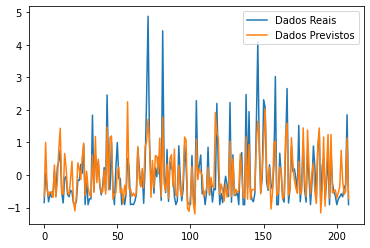

In [82]:
regressao_linear_novas_mortes("Brazil",df)

<h2>Regressão Polinomial (Polynomial Regression)</h2>

REGRESSÃO POLINOMIAL NOVAS MORTES
--------------------------------------------------------------------------------
País: Brazil
Quantidade de linhas: 1044
Intercept (interceptação):  35.68620895386948
--------------------------------------------------------------------------------
Métricas do Modelo:

Mean Absolute Error: 136.44425904512318
Mean Squared Error: 43778.873064400286
Root Mean Squared Error: 209.23401507498795
R2: 0.9201789750002409
--------------------------------------------------------------------------------


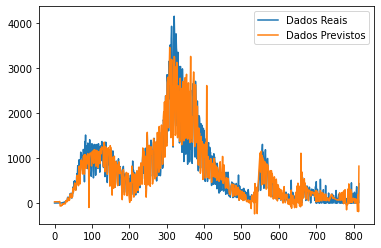

In [83]:
regressao_polinomial_novas_mortes("Brazil", df, degree=3)

<h2> Árvore de Decisão Regressão (Decision Tree Regression)</h2>

ÁRVORE DE DECISÃO COM REGRESSÃO NOVAS MORTES
--------------------------------------------------------------------------------
País: Brazil
Quantidade de linhas: 1044
--------------------------------------------------------------------------------
Métricas do Modelo:

Mean Absolute Error: 0.29921914839407604
Mean Squared Error: 0.19175159345753245
Root Mean Squared Error: 0.43789450037370015
R2: 0.8082484065424675
--------------------------------------------------------------------------------


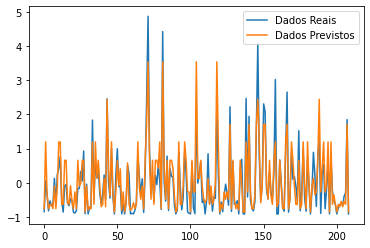

In [84]:
arvore_decisao_regressao_novas_mortes("Brazil", df)

<h2> Random Forest</h2>

RANDOM FOREST REGRESSOR NOVOS CASOS
--------------------------------------------------------------------------------
País: Brazil
Quantidade de linhas: 1044


<ipython-input-81-da0137851a1c>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit (x_train, y_train)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Métricas do Modelo:

Mean Absolute Error: 0.2261758608005112
Mean Squared Error: 0.10722014693416809
Root Mean Squared Error: 0.32744487617638496
R2: 0.892779853065832
--------------------------------------------------------------------------------


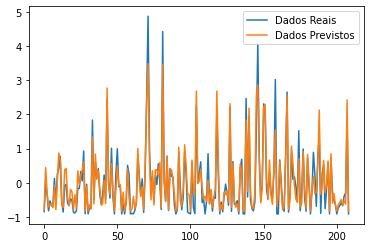

In [85]:
random_forest_novas_mortes("Brazil",df)

In [ ]:
#Testando o melhor modelo
dados_covid19_brasil = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana